# Mobike Dataset Analysis
## by Linlin Lu

## Investigation Overview

> find the peak time and locations of the use of Mobike.

## Dataset Overview

> There are 10241 items in this mobike dataset. 
- The features include: `orderid`, `userid`, `bikeid`, start and end location information(`start_location_x`, `start_location_y`, `end_location_x`, `end_location_y`), the riding track of the user in this order (`track`), the riding time information (start_time, end_time).
 

In [2]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [3]:
# load in the dataset into a pandas dataframe
mobike = pd.read_csv('mobike_shanghai_sample_updated.csv')

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

In [4]:
# start_time和end_time转为时间类型
mobike.start_time = pd.to_datetime(mobike.start_time)
mobike.end_time = pd.to_datetime(mobike.end_time)

## 1- The time-depending analysis of mobike dataset

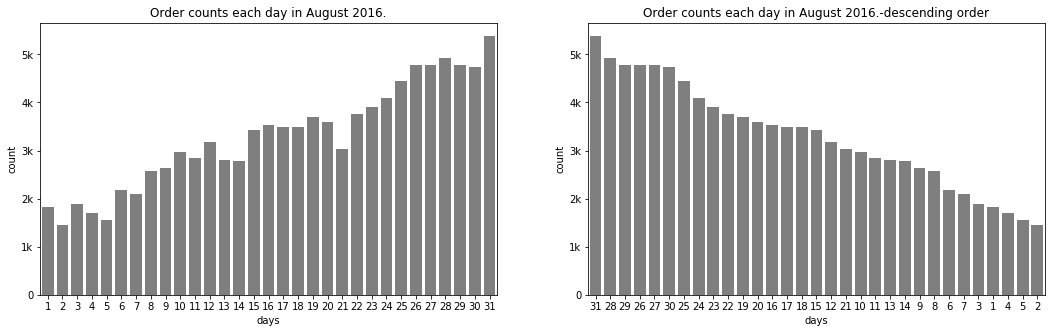

In [20]:
# 提取start_time的 星期几（1-7）；月份（1-12）；时间Hour（0-23）
weekdays = []
months = []
hours = []
days = []
end_hours = []
for i in range(len(mobike)):
    months.append(mobike.start_time[i].month)
    weekdays.append(mobike.start_time[i].isoweekday())
    hours.append(mobike.start_time[i].hour)
    end_hours.append(mobike.end_time[i].hour)
    days.append(mobike.start_time[i].day)
    
mobike['weekdays'] = weekdays
mobike['months'] = months
mobike['hours'] = hours
mobike['end_hours'] = end_hours
mobike['days'] = days

base_color = sb.color_palette()[7]
# create the plot of day
day_order = mobike['days'].value_counts().index
plt.figure(figsize = [18,5])
plt.subplot(1,2,1)
sb.countplot(data = mobike, x='days', color =base_color)
plt.title('Order counts each day in August 2016.')
plt.yticks([0,1000,2000,3000,4000,5000],['0','1k','2k','3k','4k','5k'])
plt.subplot(1,2,2)
sb.countplot(data = mobike, x='days', color =base_color, order = day_order)
plt.title('Order counts each day in August 2016.-descending order')
plt.yticks([0,1000,2000,3000,4000,5000],['0','1k','2k','3k','4k','5k']);


####  Since August 29,30,31 are Monday, Tuesday, Wednesday. So on the each weeday count plot, those three weekdays are much more than the other days.

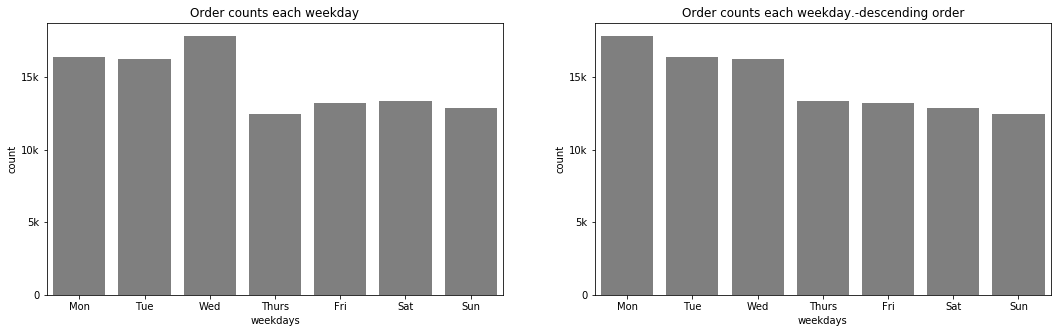

In [19]:

# create the plot of weekday
weekday_order = mobike['weekdays'].value_counts().index
plt.figure(figsize = [18,5])
base_color = sb.color_palette()[7]
plt.subplot(1,2,1)
sb.countplot(data = mobike, x='weekdays', color =base_color)
plt.title('Order counts each weekday')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
plt.yticks([0,5000,10000,15000],['0','5k','10k','15k'])

plt.subplot(1,2,2)
sb.countplot(data = mobike, x='weekdays', color =base_color,order = weekday_order)
plt.title('Order counts each weekday.-descending order')
plt.xticks([0,1,2,3,4,5,6],['Mon','Tue','Wed','Thurs','Fri','Sat','Sun'])
plt.yticks([0,5000,10000,15000],['0','5k','10k','15k']);


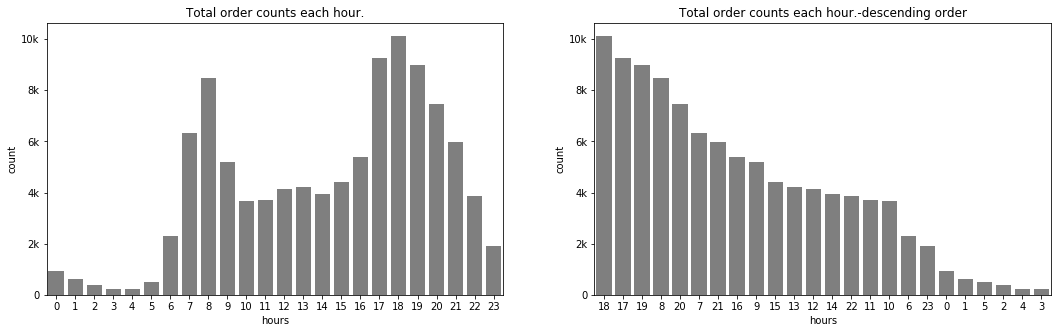

In [18]:
# create the plot of hour
hour_order = mobike['hours'].value_counts().index
plt.figure(figsize = [18,5])
plt.subplot(1,2,1)
sb.countplot(data = mobike, x='hours', color =base_color)
plt.title('Total order counts each hour.')
plt.yticks([0,2000,4000,6000,8000,10000],['0','2k','4k','6k','8k','10k'])

plt.subplot(1,2,2)
sb.countplot(data = mobike, x='hours', color =base_color, order = hour_order)
plt.title('Total order counts each hour.-descending order')
plt.yticks([0,2000,4000,6000,8000,10000],['0','2k','4k','6k','8k','10k']);

## 2- How long does people ride with Mobike?
####  Below figures show the `ridingTime` VS `counts`
- The left figure shows the wholeView of the dataset
- The middle figure shows the majority of data (excluding the outliers), with linear x ticks.
- The right figure shows the majority of data (excluding the outliers), with log x ticks.

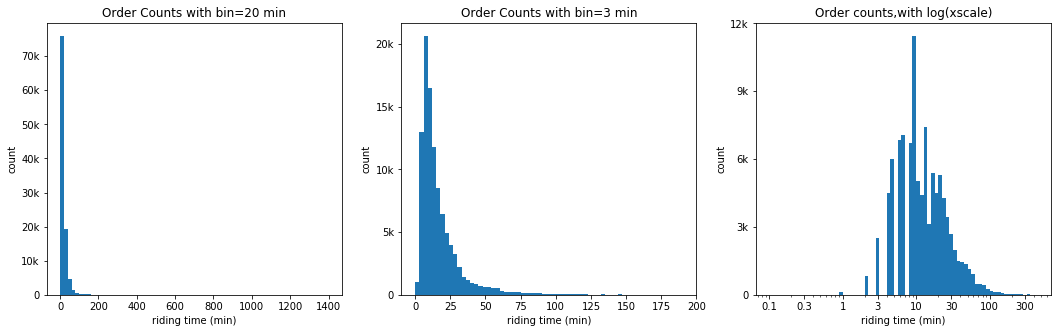

In [17]:
# 增加变量`骑行时长`到mobike数据
mobike['time_length'] = mobike['end_time'] - mobike['start_time']
# 用 apply, lambda, 更改time_length
mobike['time_length'] = mobike['time_length'].apply(lambda x: (x.seconds)/60)
plt.figure(figsize=[18,5])


plt.subplot(1,3,1)
bin_edges = np.arange(0, mobike['time_length'].max()+1, 20)
plt.hist(data = mobike, x = 'time_length', bins = bin_edges)
plt.ylabel('count')
plt.xlabel('riding time (min)')
plt.yticks([0,10000,20000,30000,40000,50000,60000,70000],['0','10k','20k','30k','40k','50k','60k','70k'])
plt.title('Order Counts with bin=20 min')

plt.subplot(1,3,2)
bin_edges = np.arange(0, mobike['time_length'].max()+1, 3)
plt.hist(data = mobike, x = 'time_length', bins = bin_edges)
plt.xlim(-10,200)
plt.ylabel('count')
plt.xlabel('riding time (min)')
plt.yticks([0,5000,10000,15000,20000],['0','5k','10k','15k','20k'])
plt.title('Order Counts with bin=3 min')

plt.subplot(1,3,3)
bins = 10 ** np.arange(-1, 2.7, 0.05)
ticks = [0.1,0.3,1,3,10,30,100,300]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = mobike, x = 'time_length', bins = bins)
plt.xscale('log')
plt.xticks(ticks,labels)
plt.ylabel('count')
plt.xlabel('riding time (min)')
plt.yticks([0,3000,6000,9000,12000],['0','3k','6k','9k','12k'])
plt.title('Order counts,with log(xscale)');

##### As we can see from the figures, that 
- the riding peak falls in: 7:00-9:00, when people goes to work; 
- and 17:00-20:00 when it's time to off work.
- the most riding time is around 10 mins.


## 3- The start riding locations distribution

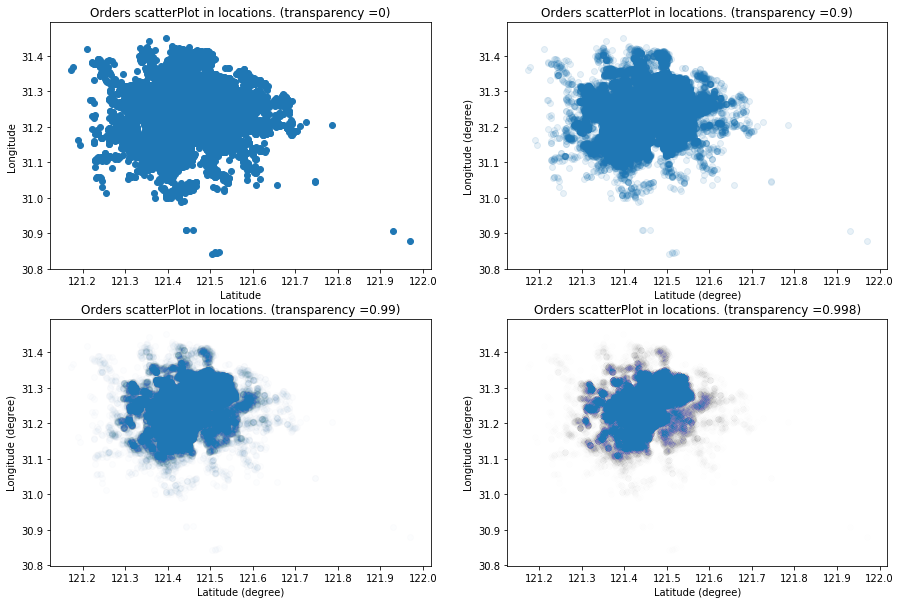

In [22]:
plt.figure(figsize=[15,10])
plt.subplot(2,2,1)
plt.scatter(mobike['start_location_x'],mobike['start_location_y'])
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.title('Orders scatterPlot in locations. (transparency =0)')
plt.subplot(2,2,2)
plt.scatter(mobike['start_location_x'],mobike['start_location_y'],alpha = 0.1)
plt.xlabel('Latitude (degree)')
plt.ylabel('Longitude (degree)')
plt.title('Orders scatterPlot in locations. (transparency =0.9)')

plt.subplot(2,2,3)
plt.scatter(mobike['start_location_x'],mobike['start_location_y'],alpha = 0.01)
plt.xlabel('Latitude (degree)')
plt.ylabel('Longitude (degree)')
plt.title('Orders scatterPlot in locations. (transparency =0.99)')

plt.subplot(2,2,4)
plt.scatter(mobike['start_location_x'],mobike['start_location_y'],alpha = 0.002)
plt.xlabel('Latitude (degree)')
plt.ylabel('Longitude (degree)')
plt.title('Orders scatterPlot in locations. (transparency =0.998)');


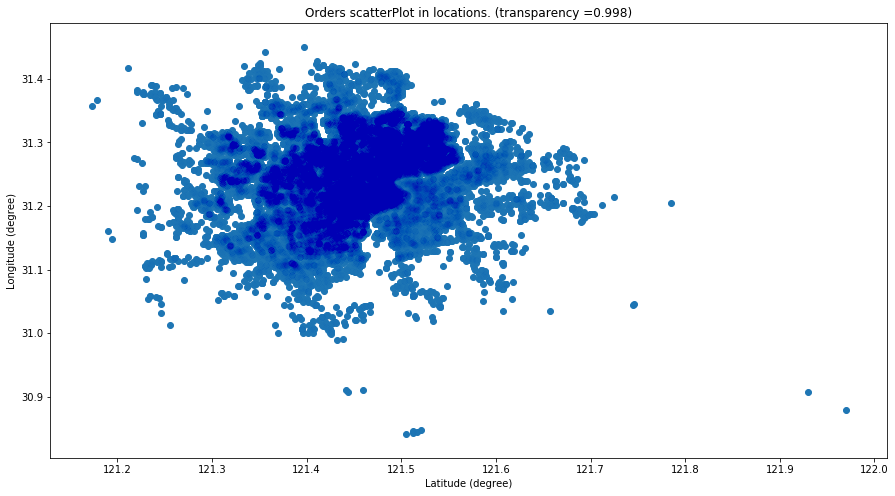

In [23]:
plt.figure(figsize=[15,8])
plt.scatter(mobike['start_location_x'],mobike['start_location_y'])
plt.scatter(mobike['start_location_x'],mobike['start_location_y'],alpha = 0.002,color = 'b')
plt.xlabel('Latitude (degree)')
plt.ylabel('Longitude (degree)')
plt.title('Orders scatterPlot in locations. (transparency =0.998)');


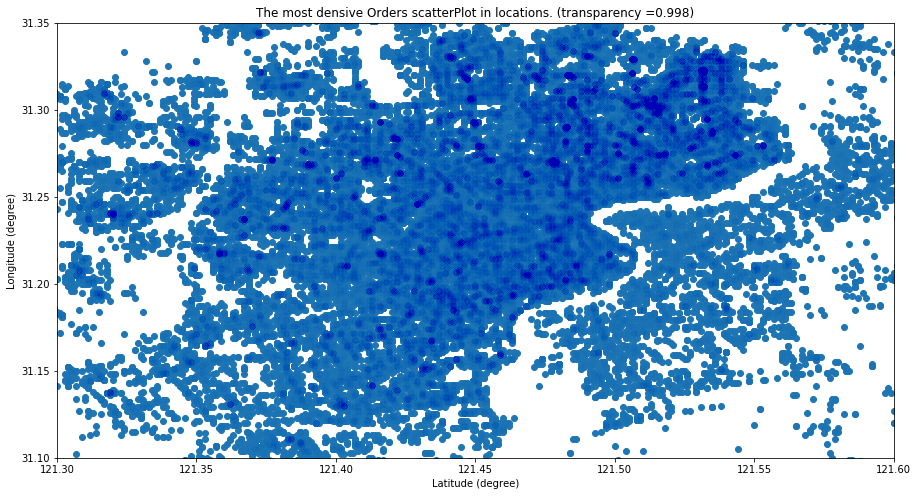

In [24]:
plt.figure(figsize=[15,8])
plt.scatter(mobike['start_location_x'],mobike['start_location_y'])
plt.scatter(mobike['start_location_x'],mobike['start_location_y'],alpha = 0.002,c='b')
plt.xlim(121.3,121.6)
plt.ylim(31.1,31.35)
plt.xlabel('Latitude (degree)')
plt.ylabel('Longitude (degree)')
plt.title('The most densive Orders scatterPlot in locations. (transparency =0.998)');


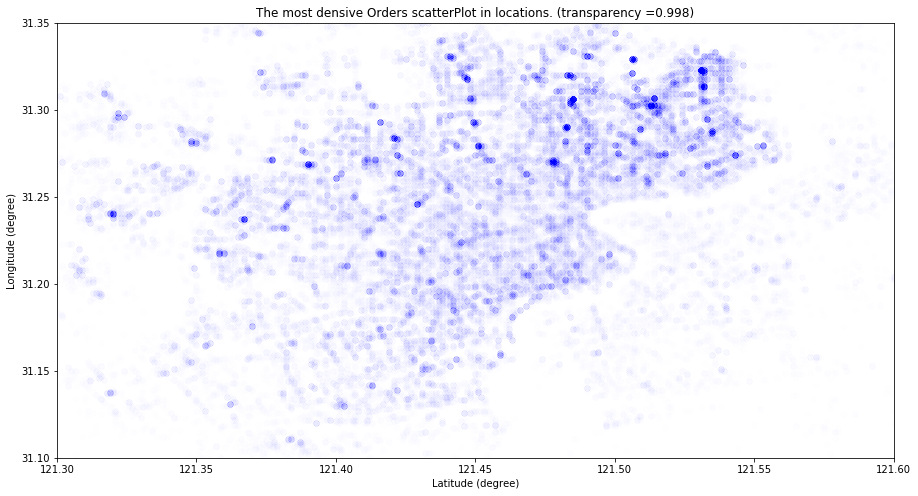

In [25]:
plt.figure(figsize=[15,8])
plt.scatter(mobike['start_location_x'],mobike['start_location_y'],alpha = 0.002,c='b')
plt.xlim(121.3,121.6)
plt.ylim(31.1,31.35)
plt.xlabel('Latitude (degree)')
plt.ylabel('Longitude (degree)')
plt.title('The most densive Orders scatterPlot in locations. (transparency =0.998)');

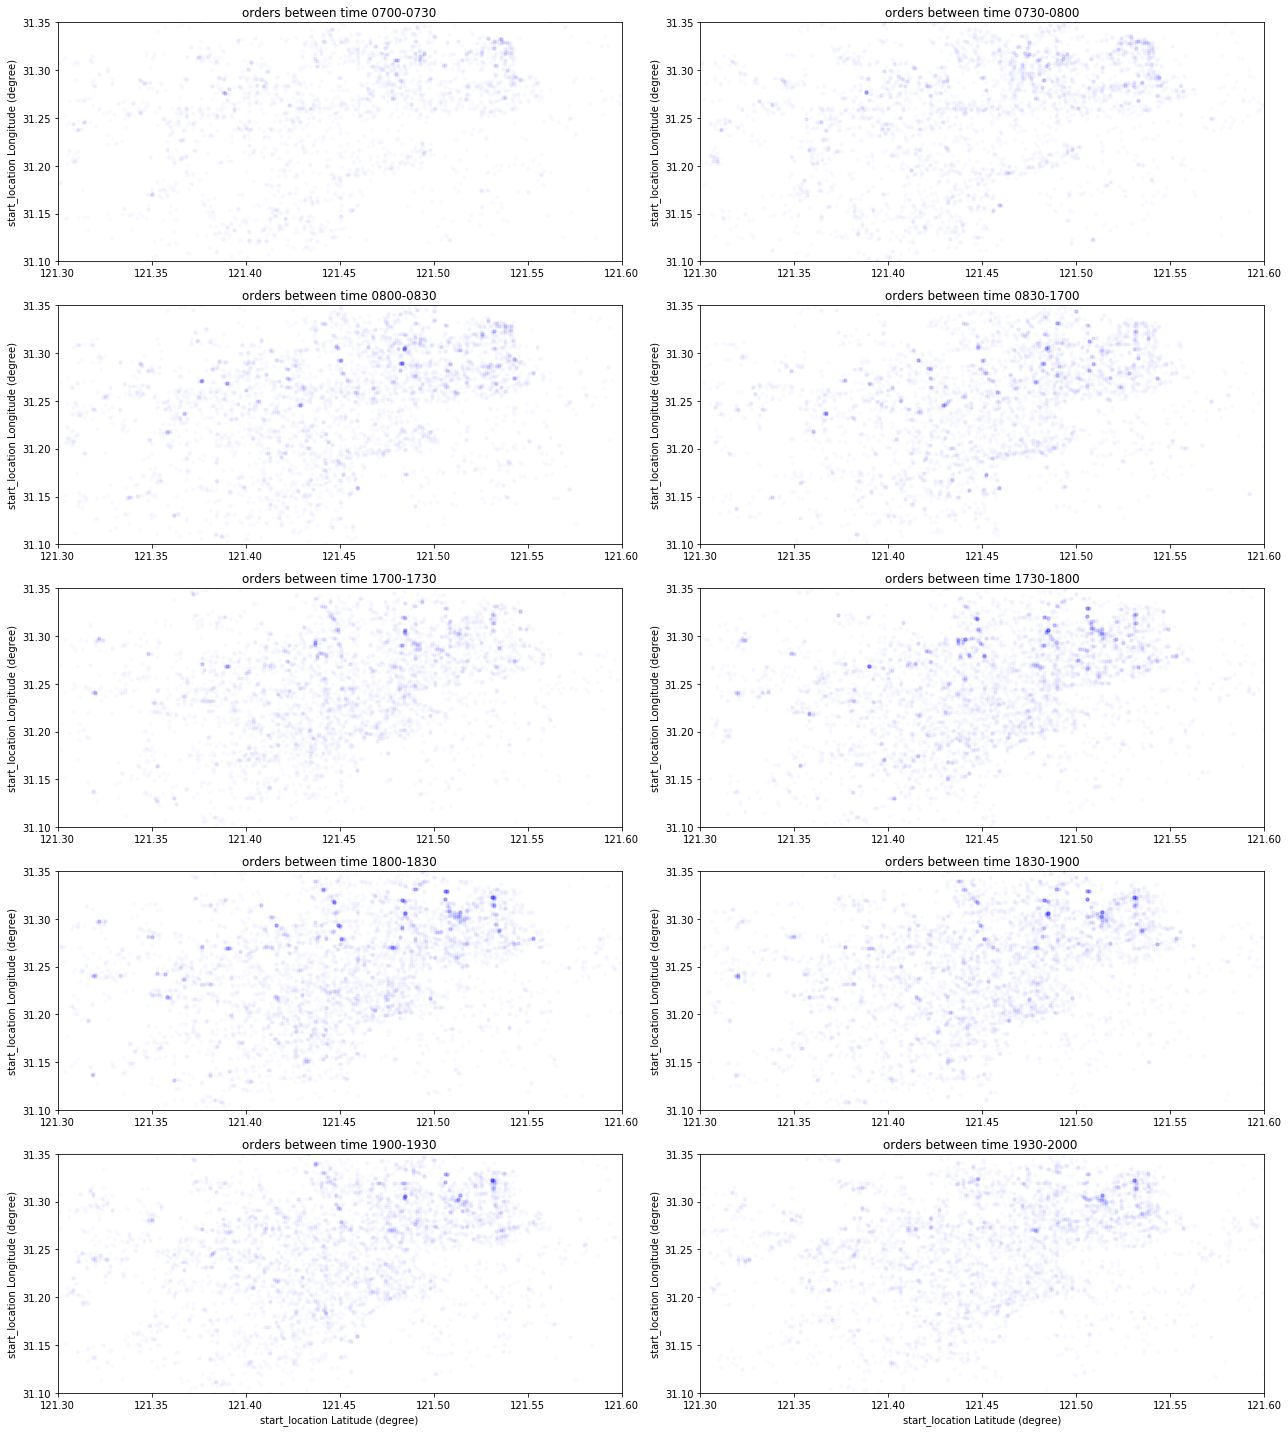

In [26]:
mobike['time_category']=None
for i in range(len(mobike)):
    if mobike['start_time'][i].minute <30:
        mobike['time_category'][i] = str(mobike['start_time'][i].hour).rjust(2,'0') + '00'
    else:
        mobike['time_category'][i] = str(mobike['start_time'][i].hour).rjust(2,'0') + '30'
mobike['time_category'] = mobike['time_category'].astype('category')
times = ['0700','0730','0800','0830','1700','1730','1800','1830','1900','1930']
plt.figure(figsize = [18,20])
for i in range(len(times)):
    df_temp = mobike[mobike['time_category']==times[i]]
    plt.subplot(5,2,i+1)
    plt.scatter(df_temp['start_location_x'],df_temp['start_location_y'],alpha = 0.02,c='b',s=10)
    plt.xlim(121.3,121.6)
    plt.ylim(31.1,31.35)
    if i in [8,9]:
        plt.xlabel('start_location Latitude (degree)')
    plt.ylabel('start_location Longitude (degree)')
    if i<9:
        plt.title('orders between time '+ times[i]+'-'+times[i+1])
    else:
        plt.title("orders between time 1930-2000 ")
plt.tight_layout()


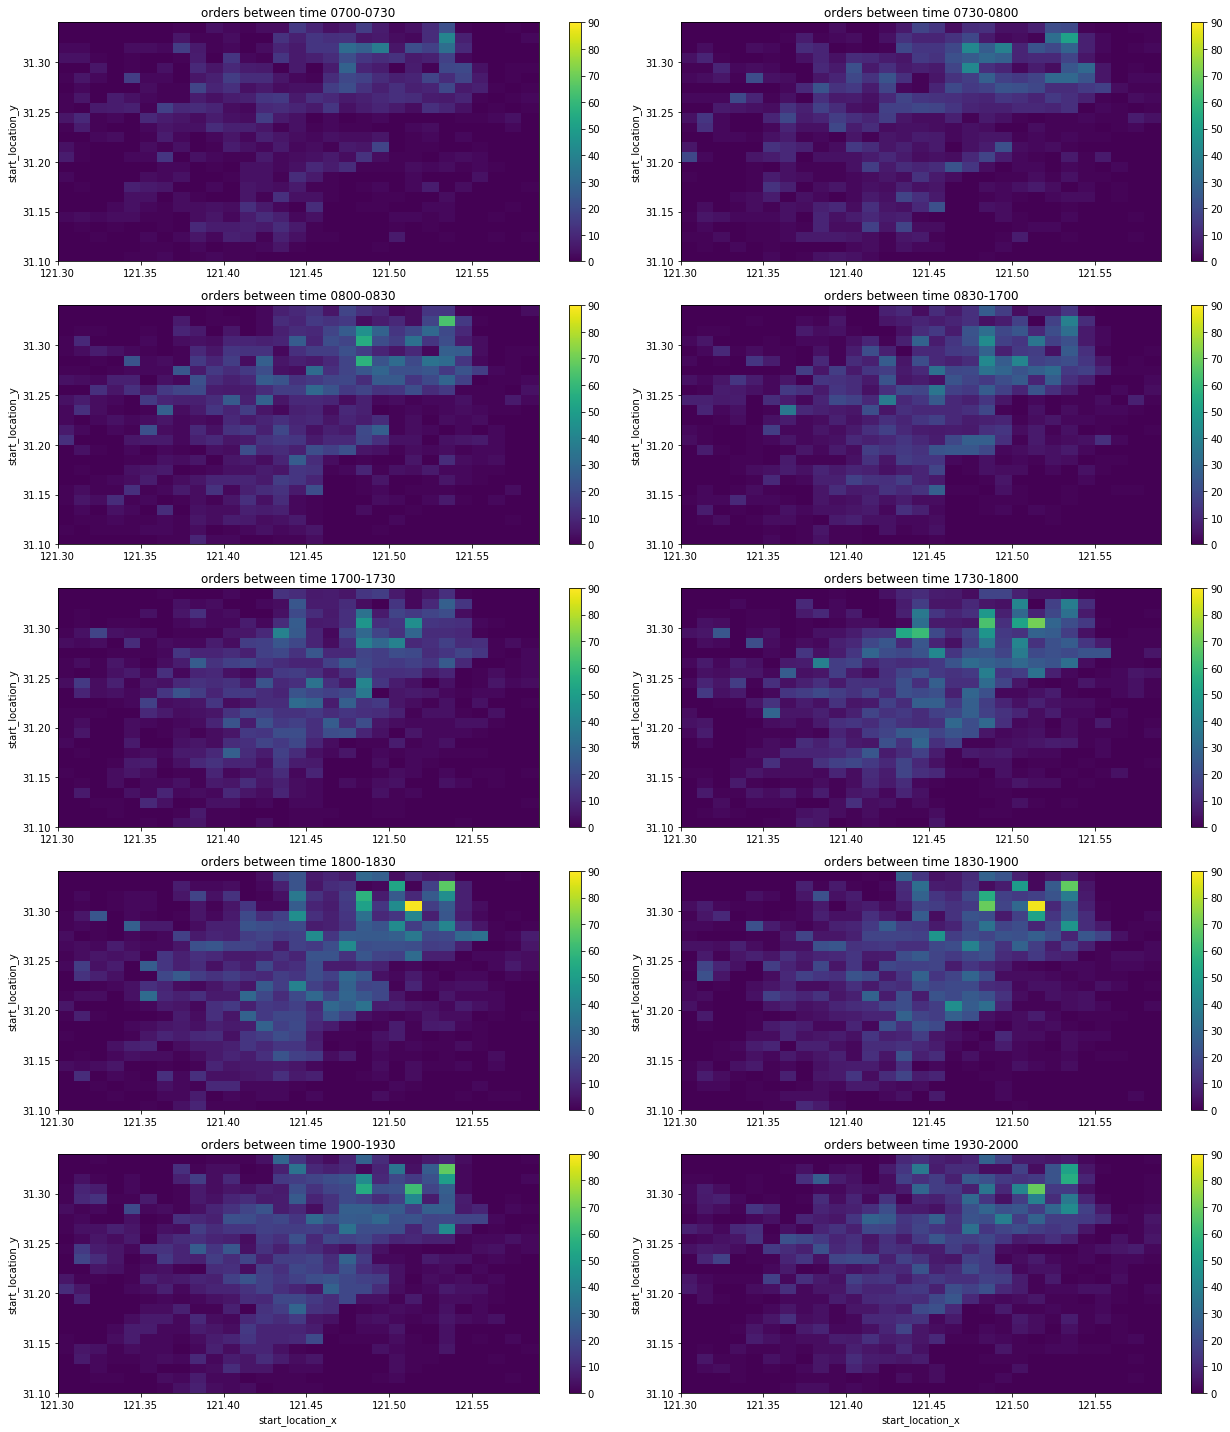

In [41]:
plt.figure(figsize = [18,20])
for i in range(len(times)):
    bins_x = np.arange(121.30, 121.60, 0.01)
    bins_y = np.arange(31.1, 31.35, 0.01)
    plt.subplot(5,2,i+1)
    plt.hist2d(data = mobike[mobike['time_category']==times[i]],x = 'start_location_x', y = 'start_location_y',
               bins = [bins_x,bins_y],vmin=0, vmax=90)
    plt.colorbar()
    if i in [8,9]:
        plt.xlabel('start_location_x,latitude (degree)')
    plt.ylabel('start_location_y,longitude (degree)')
    if i<9:
        plt.title('orders between time '+times[i]+'-'+times[i+1])
    else:
        plt.title('orders between time 1930-2000')
plt.tight_layout()

#### 鉴于有的单车被使用次数很多，用时可能并不长。所以上图并不能完全反映，单车的真正需求。
> - 从上面结果可以看出，位置峰值约位于 x:121.48-121.55; y:31.25-31.35
> - 下一步：把track的每个位置画出，可以看到真正需求量大的地方。


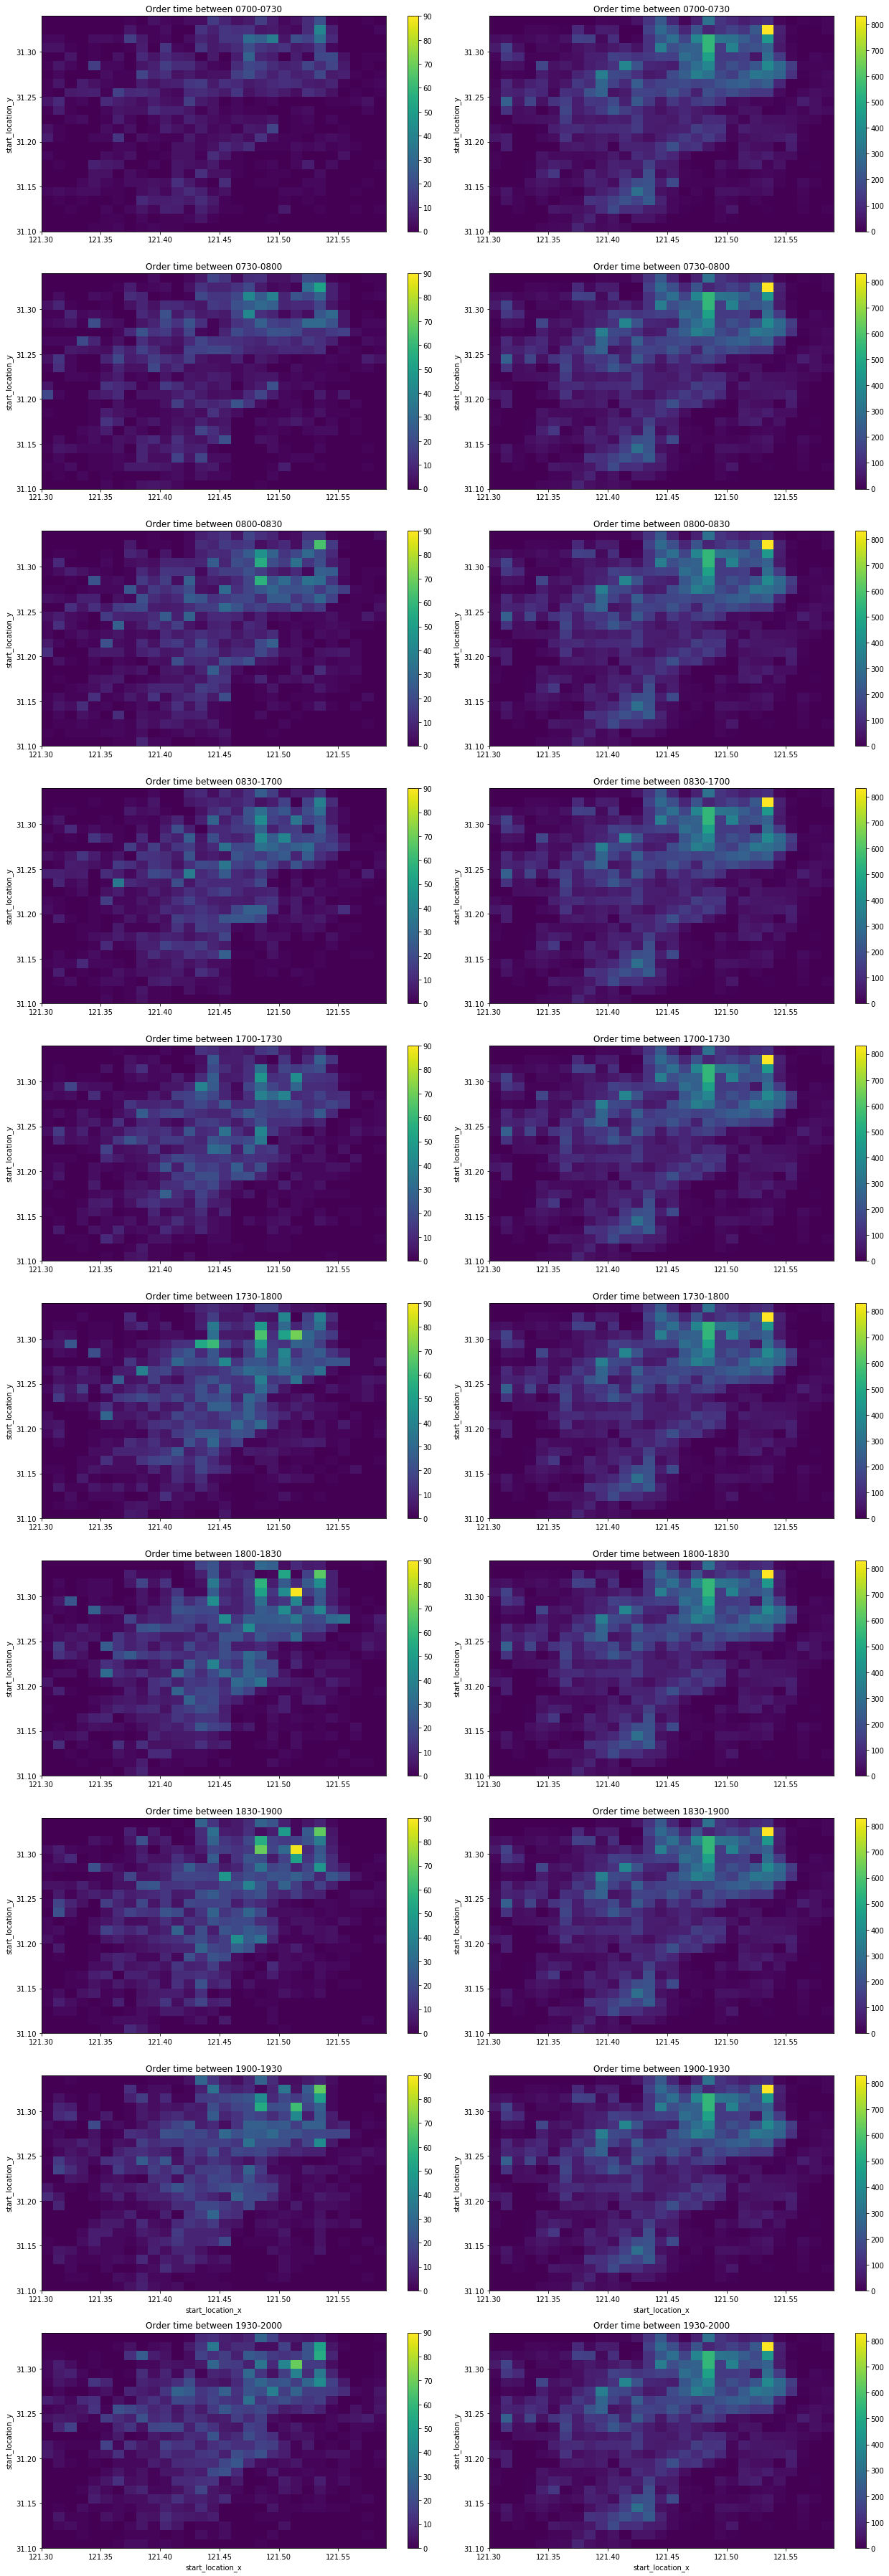

In [27]:
data = {}
for i in range(len(times)):
    bins_x = np.arange(121.30, 121.60, 0.01)
    bins_y = np.arange(31.1, 31.35, 0.01)
    data[i] = mobike[mobike['time_category']==times[i]]

track_x = {}
track_y = {}
for j in range(len(times)):
    df = data[j]
    temp_x = []
    temp_y = []
    for m in range(len(df)):
        temp1 = df['track'][df.index[m]].split('#')
        for i in range(len(temp1)):
            try:
                temp_x.append(float(temp1[i].split(',')[0]))
                temp_y.append(float(temp1[i].split(',')[1]))
            except:
                temp_y.append('31.28')
    track_x[j] = temp_x
    track_y[j] = temp_y

tracks={}
tracks['track_position_x']=track_x[0]
tracks['track_position_y']=track_y[0]

tracks = pd.DataFrame(tracks)

plt.figure(figsize = [18,50])
bins_x = np.arange(121.30, 121.60, 0.01)
bins_y = np.arange(31.1, 31.35, 0.01)
for i in range(len(times)):
    plt.subplot(10,2,2*i+1)
    plt.hist2d(data = mobike[mobike['time_category']==times[i]],x = 'start_location_x', y = 'start_location_y',
               bins = [bins_x,bins_y],vmin=0, vmax=90)
    plt.colorbar()
    if i in [8,9]:
        plt.xlabel('start_location_x')
    plt.ylabel('start_location_y')
    if i<9:
        plt.title('Order time between '+times[i]+'-'+times[i+1])
    else:
        plt.title('Order time between 1930-2000')
        
    plt.subplot(10,2,2*i+2)
    plt.hist2d(data = tracks,x = 'track_position_x', y = 'track_position_y',bins = [bins_x,bins_y])
    plt.colorbar()
    if i in [8,9]:
        plt.xlabel('start_location_x')
    plt.ylabel('start_location_y')
    if i<9:
        plt.title('Order time between '+times[i]+'-'+times[i+1])
    else:
        plt.title('Order time between 1930-2000')
    
plt.tight_layout()

## 在上图中，位于经度121.5， 纬度31.3的位置在每个时间点均最亮。
- ## 即 该位置附近在上下班高峰期有对Mobike有很强的需求。
### 在地图中根据经纬度查找黄色位置，得到如下：
![WX20200208-142306@2x.png](https://i.loli.net/2020/02/08/U481ilkSmvBraPX.png)

> Once you're ready to finish your presentation, check your output by using
nbconvert to export the notebook and set up a server for the slides. From the
terminal or command line, use the following expression:
> > `jupyter nbconvert <file_name>.ipynb --to slides --post serve --template output_toggle`

> This should open a tab in your web browser where you can scroll through your
presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent
slide. Make sure you remove all of the quote-formatted guide notes like this one
before you finish your presentation!